# Sharing visualizations with others
**This chapter shows you how to share your visualizations with others: how to save your figures as files, how to adjust their look and feel, and how to automate their creation based on input data.**

### [Style sheets reference](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Switching between styles
Selecting a style to use affects all of the visualizations that are created after this style is selected.

Here, you will practice plotting data in two different styles. The data you will use are `seattle_weather` and `austin_weather`, both with records of the average temperature in every month.

In [2]:
seattle_weather = pd.read_csv('seattle_weather.csv')
austin_weather = pd.read_csv('austin_weather.csv')

- Select the `'ggplot'` style, create a new Figure called `fig`, and a new Axes object called `ax` with `plt.subplots`.

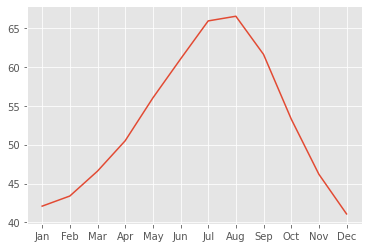

In [3]:
# Use the "ggplot" style and create new Figure/Axes
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"])
plt.show()

- Select the `'Solarize_Light2'` style, create a new Figure called `fig`, and a new Axes object called `ax` with `plt.subplots`.

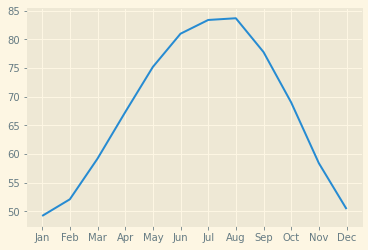

In [4]:
# Use the "Solarize_Light2" style and create new Figure/Axes
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
ax.plot(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"])
plt.show()

### Guidelines for choosing plotting style
- Dark backgrounds are usually less visible
- If color is important, consider choosing colorblind-friendly options:
    - "seaborn-colorblind" or "tableau-colorblind10"
- If you think that someone will want to print your figure, use less ink
- If it will be printed in black-and-white, use the "grayscale" style

## Saving a file several times
If you want to share your visualizations with others, you will need to save them into files. Matplotlib provides as way to do that, through the `savefig` method of the `Figure` object.

### Different file formats
```python
fig.savefig("gold_medals.jpg")
```
```python
fig.savefig("gold_medals.jpg", quality=50)
```
```python
fig.savefig("gold_medals.svg")
```

### Resolution
```python
fig.savefig("gold_medals.png", dpi=300)
```

### Size
```python
fig.set_size_inches([5, 3])
```

In [6]:
medals = pd.read_csv('medals_by_country_2016.csv', index_col=0)

<ipython-input-11-f6bdf86d65c7>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index, rotation=90)


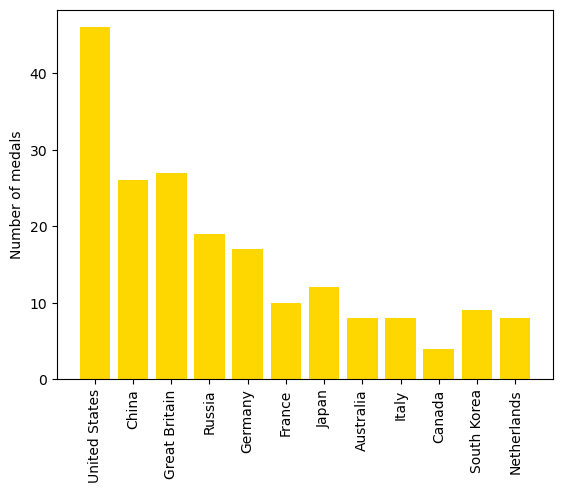

In [11]:
plt.style.use('default')

fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(medals.index, medals['Gold'], color='gold')

# Set the x-axis tick labels to the country names
ax.set_xticklabels(medals.index, rotation=90)

# Set the y-axis label
ax.set_ylabel('Number of medals')

plt.show()

- Save the figure into the file `my_figure.png`, using the default resolution.

In [12]:
# Save as a PNG file
fig.savefig('my_figure.png')

- Save the figure into the file `my_figure_300dpi.png` and set the resolution to 300 dpi.

In [13]:
# Save as a PNG file with 300 dpi
fig.savefig('my_figure_300dpi.png', dpi=300)

## Save a figure with different sizes
Before saving your visualization, you might want to also set the size that the figure will have on the page. To do so, you can use the `Figure` object's `set_size_inches` method. This method takes a sequence of two values. The first sets the width and the second sets the height of the figure.

- Set the figure size as width of 3 inches and height of 5 inches and save it as `'figure_3_5.png' `with default resolution.

In [14]:
# Set figure dimensions and save as a PNG
fig.set_size_inches([3, 5])
fig.savefig('figure_3_5.png')

- Set the figure size to width of 5 inches and height of 3 inches and save it as `'figure_5_3.png'` with default settings.

In [15]:
# Set figure dimensions and save as a PNG
fig.set_size_inches([5, 3])
fig.savefig('figure_5_3.png')

## Unique values of a column
One of the main strengths of Matplotlib is that it can be automated to adapt to the data that it receives as input. For example, if you receive data that has an unknown number of categories, you can still create a bar plot that has bars for each category.

In this exercise and the next, you will be visualizing the weight of medalis in the 2016 summer Olympic Games again, from a dataset that has some unknown number of branches of sports in it. 

In [20]:
summer_2016_medals = pd.read_csv('summer2016.csv')

- Create a variable called `sports_column` that holds the data from the `"Sport"` column of the `DataFrame` object.
- Use the `unique` method of this variable to find all the unique different sports that are present in this data, and assign these values into a new variable called `sports`.
- Print the `sports` variable to the console.

In [21]:
# Extract the "Sport" column
sports_column = summer_2016_medals['Sport']

# Find the unique values of the "Sport" column
sports = sports_column.unique()

# Print out the unique sports values
print(sports)

['Rowing' 'Taekwondo' 'Handball' 'Wrestling' 'Gymnastics' 'Swimming'
 'Basketball' 'Boxing' 'Volleyball' 'Athletics' 'Rugby Sevens' 'Judo'
 'Rhythmic Gymnastics' 'Weightlifting' 'Equestrianism' 'Badminton'
 'Water Polo' 'Football' 'Fencing' 'Shooting' 'Sailing' 'Beach Volleyball'
 'Canoeing' 'Hockey' 'Cycling' 'Tennis' 'Diving' 'Table Tennis'
 'Triathlon' 'Archery' 'Synchronized Swimming' 'Modern Pentathlon'
 'Trampolining' 'Golf']


## Automate your visualization
One of the main strengths of Matplotlib is that it can be automated to adapt to the data that it receives as input. For example, if you receive data that has an unknown number of categories, you can still create a bar plot that has bars for each category.

This is what you will do in this exercise. You will be visualizing data about medal winners in the 2016 summer Olympic Games again, but this time you will have a dataset that has some unknown number of branches of sports in it. 

- Iterate over the values of `sports` setting `sport` as your loop variable.
- In each iteration, extract the rows where the `"Sport"` column is equal to `sport`.
- Add a bar to the provided `ax` object, labeled with the sport name, with the mean of the `"Weight"` column as its height, and the standard deviation as a y-axis error bar.
- Save the figure into the file `"sports_weights.png"`.

<ipython-input-26-7c291de6c677>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sports, rotation=90)


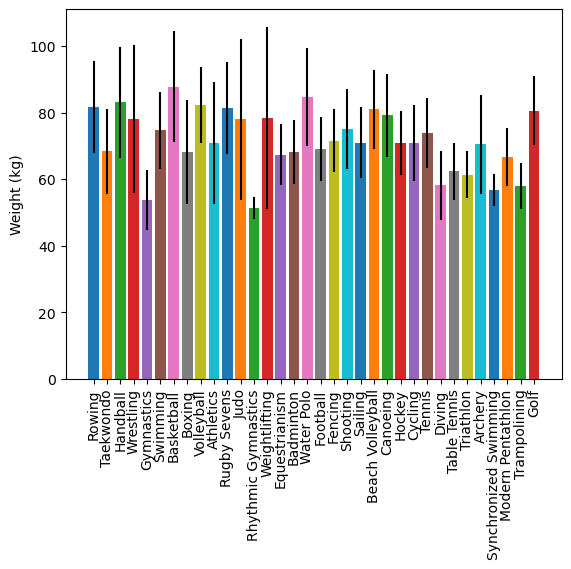

In [26]:
fig, ax = plt.subplots()

# Loop over the different sports branches
for sport in sports:
  # Extract the rows only for this sport
  sport_df = summer_2016_medals[summer_2016_medals['Sport'] == sport]
  # Add a bar for the "Weight" mean with std y error bar
  ax.bar(sport, sport_df['Weight'].mean(), yerr=sport_df['Weight'].std())

ax.set_ylabel("Weight (kg)")
ax.set_xticklabels(sports, rotation=90)
plt.show()

# Save the figure to file
fig.savefig('sports_weights.png')

<ipython-input-24-0e17f7e7a9fc>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sports, rotation=90)


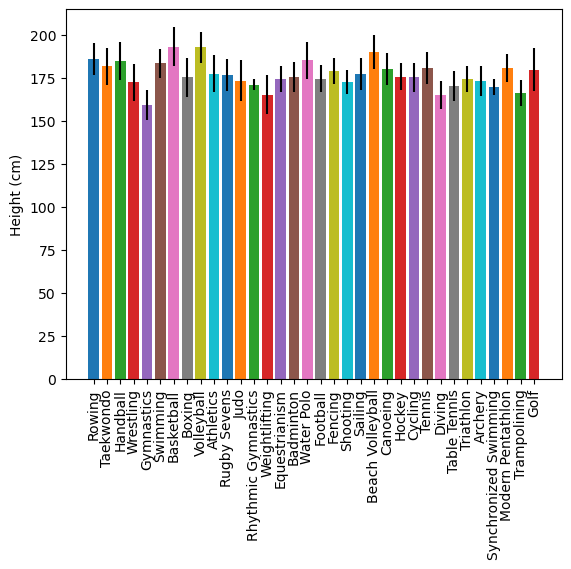

In [24]:
fig, ax = plt.subplots()

for sport in sports:
    
    sport_df = summer_2016_medals[summer_2016_medals["Sport"] == sport]
    
    ax.bar(sport, sport_df["Height"].mean(), yerr=sport_df["Height"].std())

ax.set_ylabel("Height (cm)")

ax.set_xticklabels(sports, rotation=90)

plt.show()